In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')

In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## properties of data
### Every attribute is in numeric format 
### target attribute is in object type 
### Id attribute is immaterial, should not be considered for decision tree

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Working on model  

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [6]:
#define X and y 
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df[['Species']]

In [15]:
#train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
model = DecisionTreeClassifier(criterion="entropy")

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred = model.predict(X_test)

## data visualization

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

In [44]:
#text representation 
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



[Text(0.4, 0.9166666666666666, 'PetalLengthCm <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'), Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'), Text(0.5, 0.75, 'PetalWidthCm <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'), Text(0.2, 0.5833333333333334, 'PetalLengthCm <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'), Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'), Text(0.3, 0.4166666666666667, 'PetalWidthCm <= 1.55\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]\nclass = Iris-virginica'), Text(0.2, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'), Text(0.4, 0.25, 'SepalLengthCm <= 6.6\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'), Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iri

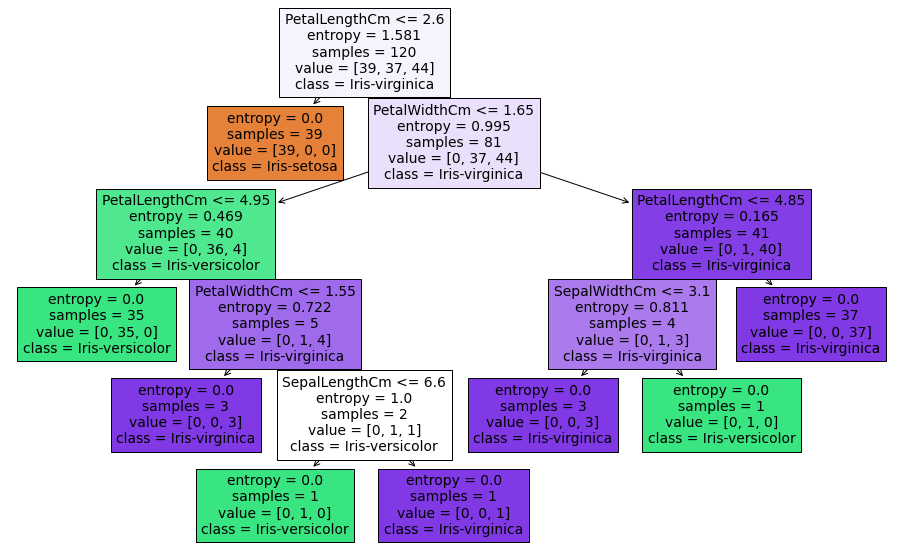

In [52]:
plt.figure(figsize=(16,10))
Treeplot = tree.plot_tree(model, 
                   feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
                class_names=model.classes_,
                   filled=True)
print(Treeplot)

## confusion matrix, accuracy testing

In [56]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\mmp23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


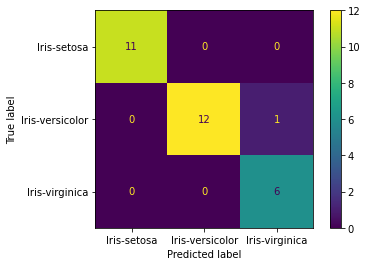

In [57]:
plot_confusion_matrix(model, X_test, y_test) 

In [58]:
#printing accuracy
print("Accuracy of model is:",metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy of model is: 96.66666666666667 %
